Model Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       474
           1       0.99      0.98      0.98       526

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



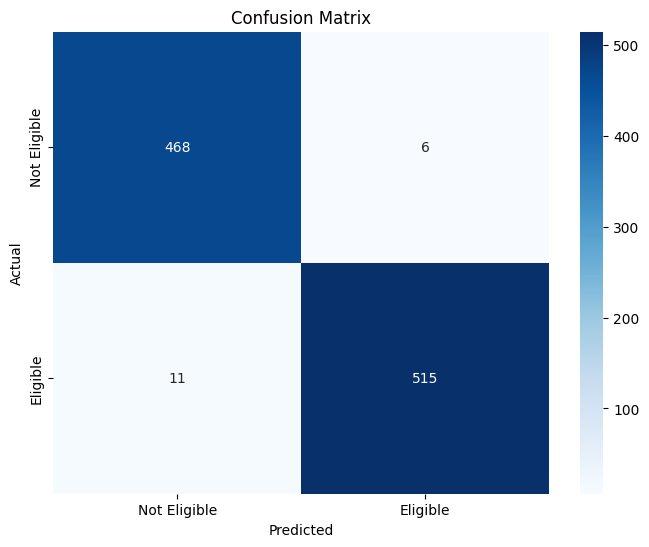

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# ======================
# 1. DATA PREPARATION
# ======================

# Define all possible programs (REB + RTB)
ALL_PROGRAMS = [
    # REB programs
    'Agri Mechanization Technology',
    'Crop Production',
    'Irrigation and Drainage Technology',
    'Food Processing',
    'Horticulture Technology',
    'Mining Technology',
    'Wildlife and Conservation Technology',
    'Forest Resources Management',
    'Animal Health',
    'Construction Technology',
    'Quantity surveying',
    'Land Surveying or Geomatics',
    'Highway Engineering',
    'Water and Sanitation Technology',
    'Electrical Technology',
    'Electronics and Telecommunication Technology',
    'Biomedical Equipment Technology',
    'Renewable Energy Technology',
    'Information Technology',
    'E-Commerce',
    'Film Making and TV Production',
    'Graphic Design and Animation',
    'Automobile Technology',
    'Manufacturing Technology',
    'Air conditioning and Refrigeration Technology',
    'Mechatronics Technology',
    'Forest Engineering and Wood Technology',
    'Nature Conservation',
    'Civil Engineering',
    'Electrical Engineering',
    'Tourism',
    'Transport and logistics',
    'ICT',
    'Creative Art',
    'Mechanical Engineering',
    'Hospitality Management',
    
    # RTB programs
    'Land surveying',
    'Civil Engineering Technology',
    'Electrical Engineering Technology',
    'Mechanical Engineering Technology',
    'Software Development',
    'Computer Engineering',
    'Geomatics Engineering',
    'Water Engineering',
    'Telecommunications Engineering',
    'Logistics and Supply Chain Management', 
    'Airline and Airport Management',
    'Web Application and Development',  # Added missing program
    'Tourism Destination Management',
    'Tours and Travel Management',
    'Hospitality Management with the option of Food and Beverage',
    'Hospitality Management with the option of Room Division',
    'Electrical Automation'
]

# Define subject combinations with actual subject names (REB + RTB)
COMBINATION_SUBJECTS = {
    # REB combinations
    'PCB': ['Physics', 'Chemistry', 'Biology'],
    'PCM': ['Physics', 'Chemistry', 'Mathematics'],
    'PEM': ['Physics', 'Economics', 'Mathematics'],
    'MCB': ['Mathematics', 'Chemistry', 'Biology'],
    'BCG': ['Biology', 'Chemistry', 'Geography'],
    'MPG': ['Mathematics', 'Physics', 'Geography'],
    'MEG': ['Mathematics', 'Economics', 'Geography'],
    'MPC': ['Mathematics', 'Physics', 'Computer'],
    'MPB': ['Mathematics', 'Physics', 'Biology'],
    'HEG': ['History', 'Economics', 'Geography'],
    'EFK': ['English', 'French', 'Kinyarwanda'],
    'EKK': ['English', 'Kiswahili', 'Kinyarwanda'],
    'LEG': ['Literature', 'Economics', 'Geography'],
    'MEC': ['Mathematics', 'Economics', 'Computer'],
    'BEG': ['Biology', 'Economics', 'Geography'],
    'HEL': ['History', 'Economics', 'Literature'],
    
    # RTB (TVET) combinations
    'ACCOUNTING': ['Principles of Auditing and Ethics in Accounting','Monitoring Inventory System and Costing',
                   'Principle of Economics','Financial Accounting','Taxation','Credit Management and Creditors Account',
                   'Mathematics II', 'Practical ACC'],
    'LSV': ['Road Alignment and Setting out', 'Fundamental Surveying Computations', 
            'Practical LSV', 'Surveying Measurement Adjustment', 
            'Mathematics I', 'Performing Cadastral Measurement',
            'Performing Setting out of Structures', 'Arc GIS software in land management and mapping',
            'Operating Surveying Instruments'],
    'CET': ['Construction Materials', 'Structural Analysis', 'Geotechnical Engineering',
            'Construction Project Management', 'Building Services', 'Construction Drawing',
            'Surveying for Construction', 'Construction Technology'],
    'EET': ['Electrical Circuits', 'Electronics', 'Power Systems',
            'Control Systems', 'Renewable Energy Systems', 'Electrical Machines',
            'Electrical Installation', 'Industrial Automation'],
    'MET': ['Engineering Mechanics', 'Thermodynamics', 'Fluid Mechanics',
            'Machine Design', 'Manufacturing Processes', 'Automation and Control',
            'Mechatronics', 'Industrial Maintenance'],
    'CP': ['Methods of irrigation and extension technics', 'Nursery establishment and industrial crops growing', 
           'seed multiplication, Mushrooms and Ornamental crops', 'Soil conservation', 'Introduction to Chemistry', 
           'Practical CRP', 'Food crops growing and post harvest handling', 'plant biology, pests and diseases control'],
    'SoD': ['Algorithm and Programming', 'Website Development', 'System Analysis and Design', 
            'Web Application and Development', 'Database Design and Development', 'Practical SOD'], 
    'AH': ['Surgery and veternary interventions', 'Animal Diseases prevention and control', 
           'Anatomy, physiology and artificial insermination', 'Animal feeds production and feeding', 
           'Animal products control, extension and veterinary ethics', 'Micro-organism identification and infection deseases control', 
           'Organic and inorganic chemistry', 'Ruminants Farming', 'Non-ruminant farming and companion animals', 
           'Fish Farming and Beekeeping', 'Entrepreneurship and Business organization', 'English Communication Skills', 'Practical ANH'],
    'MAS': ['Masonary basic drawing', 'Practical MAS', 'Mathemetics I', 'English', 'Entrepreneurship', 
            'Constraction Technology', 'Cost Estimation, Schedule and Site records', 'Elevation and scaffording Operations', 
            'Tiles Works, Openings and Wall Plastering'],
    'WOT': ['Technical drawing, CAD, and Wooden Art style Creation', 'Wood properties and Timber Drying', 
            'Woodworking Machines Operation and Workshop Management', 'Wooden Furniture Production', 
            'Wooden Structures Construction', 'Engineered Boards and Beams Production'],
    'FOR': ['Tree Nursery Management', 'Forest Establishment and Protection', 'Forest Manageent Plan Implementation', 
            'Forest Exploitation', 'Forest Landscape Restoration'],
    'TOR': ['Coordinating Tour and Travel bookings', 'Coordinating tourism events', 'Community Based Tourism and Hertage Maintenance', 
            'Providing guidance on Destination', 'Tour guiding and tour packages management', 
            'Francaise Professionel pour le Tourisme', 'Kutumia Kiswahi'],
    'FOH': ['Providing cExcellent customer Services', 'Housekeeping Operations', 'Front Office Operations', 
            'Performing Laundry Services', 'Handle Hotel Guest and Luggage at Airport', 
            'Professional English for Front Office', 'Francaise Professional pour laccueil et L hebergement', 'Kutumia Kiswahili'],
    'MMP': ['Graphic Design', 'Photography, lighting, and images Editing', 'Sound Production', 
            'Video Production', '2D Animation Production', 'Emersive technologiesand 3D Modelling'],
    'SPE': ['Cyber Security', 'Data Stracture and Algorithms', 'Restful Service and Web/Web3 Application Development', 
            'Intelligent Robotics and Embedded Systems', 'Advanced Java Programming with OOP', 
            'Software Testing and Deployment(DevOps)', 'Cross-Platform Mobile Development', 'Software Engineering'],
    'IND': ['Soft Furnishing and Furniture design', 'Interior decoration, wall and floor finishing', 
            'Residential kitchen, bathroom, and partitions design', 'Cost estimation and interior drawing', 
            'Exhibition stand, ceiling, doors and windows design'],
    'MPA': ['Creativity, Innovation, and music Performance', 'Mastering Traditional andModern Music Performance', 
            'Music theory, Arragement and Song composition', 'Instrumental and Vocal Mastery in Music Performance', 
            'Music bussiness and industry Management'],
    'NIT': ['LAN and Zero ClientInstallation', 'Network and Fiber Optic Installation', 'Network and Systems security', 
            'Network system Automation with Machine Learning', 'IoT Systems Development and Installation', 'Claud computing'],
    'PLT': ['Plumbing drawing and planning', 'Water supply and drainage system installation', 
            'Plumbind system installation', 'Water treatment system installation', 'Water piping system'],
    'ETL': ['Embedded systems and artificial intelligence integration', 'Electronic devices repair and maintenance', 
            'Audiovisual and broadcasting system installation', 'Telecommunication and security systems installation', 
            'Power conversion,eletronic control and HVAC system installation'],
}

# Mapping of combinations to programs (REB + RTB)
COMBINATION_TO_PROGRAMS = {
    # REB mappings
    'PCB': ['Agri Mechanization Technology','Crop Production','Irrigation and Drainage Technology','Food Processing',
            'Horticulture Technology','Mining Technology','Wildlife and Conservation Technology',
            'Forest Resources Management','Animal Health'],
    'PCM': ['Agri Mechanization Technology','Irrigation and Drainage Technology','Construction Technology',
            'Quantity surveying','Land Surveying or Geomatics','Highway Engineering','Water and Sanitation Technology',
            'Electrical Technology','Electronics and Telecommunication Technology','Biomedical Equipment Technology',
            'Renewable Energy Technology','Information Technology','E-Commerce','Film Making and TV Production',
            'Graphic Design and Animation','Automobile Technology','Manufacturing Technology',
            'Air conditioning and Refrigeration Technology','Mechatronics Technology','Mining Technology',
            'Forest Resources Management','Forest Engineering and Wood Technology'],
    'PEM': ['Agri Mechanization Technology','Irrigation and Drainage Technology','Construction Technology',
            'Land Surveying or Geomatics','Highway Engineering','Water and Sanitation Technology',
            'Electrical Technology','Electronics and Telecommunication Technology','Biomedical Equipment Technology',
            'Renewable Energy Technology','Information Technology','Film Making and TV Production',
            'Graphic Design and Animation','Automobile Technology','Manufacturing Technology',
            'Air conditioning and Refrigeration Technology','Mechatronics Technology','Mining Technology',
            'Forest Engineering and Wood Technology'],
    'MCB': ['Agri Mechanization Technology', 'Crop Production','Irrigation and Drainage Technology','Food Processing',
            'Horticulture Technology','Construction Technology','Quantity surveying','Highway Engineering',
            'Water and Sanitation Technology','Manufacturing Technology','Mining Technology',
            'Wildlife and Conservation Technology','Forest Resources Management','Animal Health'],
    'BCG': ['Agri Mechanization Technology', 'Nature Conservation'],
    'MPG': ['Civil Engineering', 'Electrical Engineering'],
    'MEG': ['Tourism', 'Transport and logistics'],
    'MPC': ['ICT', 'Creative Art'],
    'MPB': ['Electrical Engineering', 'Mechanical Engineering'],
    'HEG': ['Hospitality Management', 'Tourism'],
    'EFK': ['Hospitality Management', 'Tourism'],
    'EKK': ['Hospitality Management', 'Tourism'],
    'LEG': ['Hospitality Management', 'Tourism'],
    'MEC': ['ICT', 'Electrical Engineering'],
    'BEG': ['Tourism'],
    'HEL': ['Tourism'],
    
    # RTB (TVET) mappings
    'ACCOUNTING': ['Logistics and Supply Chain Management', 'Airline and Airport Management'],
    'LSV': ['Land surveying', 'Geomatics Engineering'],
    'CET': ['Civil Engineering Technology', 'Construction Technology', 'Water Engineering'],
    'EET': ['Electrical Engineering Technology', 'Telecommunications Engineering'],
    'MET': ['Mechanical Engineering Technology', 'Automotive Technology'],
    'CP': ['Horticulture Technology', 'Food Processing', 'Irrigation and Drainage Technology', 'Crop Production', 'Agri Mechanization Technology'], 
    'SoD': ['Information Technology', 'E-Commerce', 'Film Making and TV Production', 'Graphic Design and Animation', 'Web Application and Development'],
    'AH': ['Animal Health', 'Wildlife and Conservation Technology'],
    'MAS': ['Construction Technology', 'Quantity surveying', 'Land Surveying or Geomatics', 'Highway Engineering', 'Water and Sanitation Technology'],
    'WOT': ['Forest Engineering and Wood Technology'],
    'FOR': ['Forest Resources Management'],
    'TOR': ['Tourism Destination Management','Tours and Travel Management', 
            'Hospitality Management with the option of Food and Beverage',
            'Hospitality Management with the option of Room Division'],
    'FOH': ['Hospitality Management with the option of Room Division'],
    'MMP': ['Information Technology', 'Film Making and TV Production', 'Graphic Design and Animation'],
    'SPE': ['Information Technology', 'Software Development'],
    'IND': ['Construction Technology', 'Quantity surveying'],
    'MPA': ['Film Making and TV Production', 'Graphic Design and Animation'],
    'NIT': ['E-Commerce', 'Information Technology'],
    'PLT': ['Irrigation and Drainage Technology'],
    'ETL': ['Electrical Automation']
}

def check_admission_eligibility(combination, year, scores, fee_paid, is_tvet=False):
    """Check if student meets minimum admission criteria"""
    if not fee_paid:
        return False, []
    
    if is_tvet:
        # TVET (RTB) requirements - need to pass all principal subjects
        meets_req = all(score >= 50 for score in scores)
    else:
        # REB requirements
        if year < 2024:
            principal_passes = sum(score >= 50 for score in scores)
            meets_req = principal_passes >= 2
        else:
            meets_req = all(score >= 50 for score in scores)
    
    if not meets_req:
        return False, []
    
    return True, COMBINATION_TO_PROGRAMS.get(combination, [])

def generate_student(is_tvet=False):
    """Generate synthetic student data with real subject names"""
    if is_tvet:
        # Generate TVET student
        combination = np.random.choice(list(COMBINATION_SUBJECTS.keys()))
        while combination in ['PCB', 'PCM', 'PEM', 'MCB', 'BCG', 'MPG', 'MEG', 'MPC', 'MPB', 'HEG', 'EFK', 'EKK', 'LEG', 'MEC', 'BEG', 'HEL']:
            combination = np.random.choice(list(COMBINATION_SUBJECTS.keys()))
        subjects = COMBINATION_SUBJECTS[combination]
        # Determine how many subjects to select (between 5 and min(9, number of available subjects))
        max_subjects = min(9, len(subjects))
        num_subjects = np.random.randint(5, max_subjects + 1)
        selected_subjects = np.random.choice(subjects, size=num_subjects, replace=False)
        scores = np.random.uniform(40, 100, len(selected_subjects))
    else:
        # Generate REB student
        combination = np.random.choice(['PCB', 'PCM', 'PEM', 'MCB', 'BCG', 'MPG', 'MEG', 'MPC', 'MPB', 'HEG', 'EFK', 'EKK', 'LEG', 'MEC', 'BEG', 'HEL'])
        subjects = COMBINATION_SUBJECTS[combination]
        selected_subjects = subjects[:3]  # REB has exactly 3 principal subjects
        scores = np.random.uniform(40, 100, 3)
    
    year = np.random.randint(2019, 2026)
    skills = np.random.choice([0, 1], p=[0.7, 0.3])
    fee_paid = np.random.choice([0, 1], p=[0.1, 0.9])
    program_choice = np.random.choice(ALL_PROGRAMS)
    
    is_eligible, recommended = check_admission_eligibility(
        combination, year, scores, fee_paid, is_tvet=is_tvet
    )
    
    # Create student dictionary
    student_data = {
        'combination': combination,
        'completed_year': year,
        'has_trade_skills': skills,
        'application_fee_paid': fee_paid,
        'program_choice': program_choice,
        'is_eligible': int(is_eligible),
        'recommended_programs': '|'.join(recommended) if recommended else 'None',
        'is_tvet': int(is_tvet)
    }
    
    # Add subject data
    for i, (subject, score) in enumerate(zip(selected_subjects, scores)):
        student_data[f'subject{i+1}'] = subject
        student_data[f'subject{i+1}_score'] = score
    
    return student_data

# Create dataset with both REB and RTB students
n_samples = 5000
data = [generate_student(is_tvet=False) for _ in range(n_samples//2)] + \
       [generate_student(is_tvet=True) for _ in range(n_samples//2)]
df = pd.DataFrame(data)

# Fill NaN values for subjects that don't exist for some students
for col in df.columns:
    if 'subject' in col and df[col].dtype == 'object':
        df[col].fillna('None', inplace=True)
    elif 'subject' in col and df[col].dtype == 'float':
        df[col].fillna(0, inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save artifacts
joblib.dump(label_encoders, 'model/label_encoders.joblib')
joblib.dump(COMBINATION_TO_PROGRAMS, 'model/program_mapping.joblib')
joblib.dump(COMBINATION_SUBJECTS, 'model/subject_mapping.joblib')

# ======================
# 2. MODEL TRAINING
# ======================

# Prepare features and target
X = df.drop(['is_eligible', 'recommended_programs'], axis=1)
y = df['is_eligible']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Save model
joblib.dump(model, 'model/admission_model.joblib')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

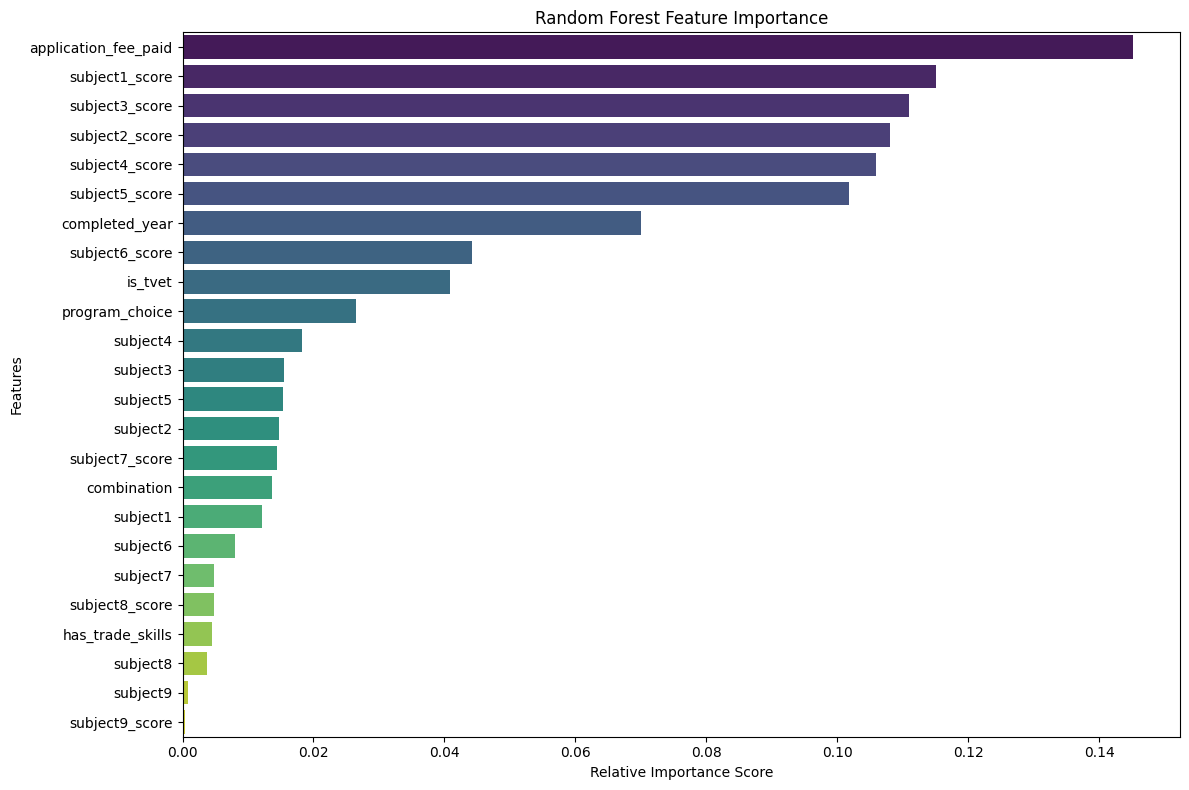


Top 5 Most Important Features:
                Feature  Importance
0  application_fee_paid    0.145105
1        subject1_score    0.115114
2        subject3_score    0.110924
3        subject2_score    0.108087
4        subject4_score    0.105965


In [3]:


# ======================
# 5. FEATURE IMPORTANCE
# ======================
def plot_feature_importance(model, X_train):
    """Display feature importance from trained model"""
    # Get feature importance
    importance = model.feature_importances_
    features = X_train.columns
    indices = np.argsort(importance)[::-1]  # Sort in descending order
    
    # Create DataFrame for visualization
    feature_importance = pd.DataFrame({
        'Feature': features[indices],
        'Importance': importance[indices]
    })
    
    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=feature_importance,
        palette='viridis'
    )
    plt.title('Random Forest Feature Importance')
    plt.xlabel('Relative Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

# Display feature importance
feature_importance_df = plot_feature_importance(model, X_train)
print("\nTop 5 Most Important Features:")
print(feature_importance_df.head(5))

In [4]:
def prepare_prediction_data(student_data, label_encoders, model):
    """Prepare and format student data for model prediction with robust error handling"""
    try:
        # Initialize with base features
        student_df_data = {
            'combination': student_data['combination'],
            'completed_year': student_data['completed_year'],
            'has_trade_skills': student_data['has_trade_skills'],
            'application_fee_paid': student_data['application_fee_paid'],
            'program_choice': student_data['program_choice'],
            'is_tvet': student_data.get('is_tvet', 0)
        }
        
        # Initialize all subject columns (up to 10 subjects)
        max_subjects = 10
        for i in range(1, max_subjects + 1):
            student_df_data[f'subject{i}'] = 'None'
            student_df_data[f'subject{i}_score'] = 0
        
        # Fill actual subject data
        for i, (subject, score) in enumerate(student_data['subject_scores']):
            if i >= max_subjects:
                break  # Don't exceed max subjects
            student_df_data[f'subject{i+1}'] = subject
            student_df_data[f'subject{i+1}_score'] = score
        
        # Create DataFrame
        student_df = pd.DataFrame([student_df_data])
        
        # Encode categorical features with robust handling
        for col in label_encoders:
            if col in student_df.columns:
                # Handle unseen labels safely
                student_df[col] = student_df[col].apply(
                    lambda x: x if x in label_encoders[col].classes_ else 'Unknown'
                )
                # Add 'Unknown' to classes if needed
                if 'Unknown' not in label_encoders[col].classes_:
                    label_encoders[col].classes_ = np.append(label_encoders[col].classes_, 'Unknown')
                student_df[col] = label_encoders[col].transform(student_df[col])
        
        # Ensure we have all columns the model expects
        if hasattr(model, 'feature_names_in_'):
            missing_features = set(model.feature_names_in_) - set(student_df.columns)
            for feature in missing_features:
                if '_score' in feature:
                    student_df[feature] = 0  # Default score for missing subjects
                else:
                    student_df[feature] = 'Unknown'
                    if feature in label_encoders:
                        if 'Unknown' not in label_encoders[feature].classes_:
                            label_encoders[feature].classes_ = np.append(label_encoders[feature].classes_, 'Unknown')
                        student_df[feature] = label_encoders[feature].transform(student_df[feature])
            
            student_df = student_df[model.feature_names_in_]
        
        return student_df
    
    except Exception as e:
        raise ValueError(f"Error preparing prediction data: {str(e)}")

def display_prediction_result(result):
    """Display comprehensive visualization of prediction results with error handling"""
    try:
        from IPython.display import display, HTML
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        # Determine colors based on decision
        decision_color = '#2ecc71' if result['decision'] == 'Admitted' else '#e74c3c'
        prob_color = '#27ae60' if result['probability'] > 0.5 else '#e74c3c'
        
        # Main result display
        display(HTML(f"""
        <div style="
            background: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%);
            color: white;
            padding: 20px;
            border-radius: 10px;
            margin-bottom: 20px;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        ">
            <h1 style="margin:0; padding:0">Admission Decision</h1>
            <h2 style="margin:0; padding:0; color:{decision_color}">
                {result['decision']} ({result['probability']*100:.1f}%)
            </h2>
            <div style="margin-top:10px">
                <span style="background:rgba(255,255,255,0.2); padding:5px 10px; border-radius:20px">
                    {result['student_type']}
                </span>
                <span style="background:rgba(255,255,255,0.2); padding:5px 10px; border-radius:20px; margin-left:5px">
                    {result['combination']}
                </span>
            </div>
        </div>
        """))
        
        # Subject performance visualization
        plt.figure(figsize=(10, 5))
        sns.set_style("whitegrid")
        
        # Prepare data for plotting
        subjects = list(result['subjects'].keys())
        scores = list(result['subjects'].values())
        colors = ['#2ecc71' if score >= 50 else '#e74c3c' for score in scores]
        
        # Create horizontal bar plot
        bars = plt.barh(subjects, scores, color=colors, height=0.6)
        plt.axvline(x=50, color='#3498db', linestyle='--', linewidth=1, label='Passing Score')
        
        # Add value labels and customize
        plt.bar_label(bars, padding=3, fmt='%.1f', fontsize=10)
        plt.title('Subject Performance', pad=20, fontsize=14)
        plt.xlabel('Score (%)', fontsize=12)
        plt.xlim(0, 100)
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
        
        # Detailed decision information
        display(HTML(f"""
        <div style="
            background-color: #f8f9fa;
            padding: 15px;
            border-radius: 5px;
            margin: 15px 0;
        ">
            <h3 style="margin-top:0">Decision Details</h3>
            <p><strong>Selected Program:</strong> {result['program_choice']}</p>
            <p><strong>Admission Probability:</strong> 
               <span style="color:{prob_color}; font-weight:bold">
               {result['probability']*100:.1f}%
               </span>
            </p>
            <p><strong>Reason:</strong> {result['message']}</p>
        </div>
        """))
        
        # Recommended programs section
        if result['recommended_programs']:
            display(HTML("<h3 style='margin-bottom:10px'>Recommended Programs</h3>"))
            for prog in result['recommended_programs']:
                is_selected = prog == result['program_choice']
                emoji = "✅" if is_selected else "➡️"
                display(HTML(f"""
                <div style="
                    background-color: {'#e3f2fd' if is_selected else '#f5f5f5'};
                    padding: 10px;
                    margin: 5px 0;
                    border-radius: 5px;
                    border-left: 4px solid {'#2196f3' if is_selected else '#9e9e9e'};
                    display: flex;
                    align-items: center;
                ">
                    <span style="margin-right:10px; font-size:1.2em">{emoji}</span>
                    <span>{prog}</span>
                </div>
                """))
    
    except Exception as e:
        print(f"Error displaying results: {str(e)}")

def predict_admission(student_data, verbose=True):
    """
    Comprehensive admission prediction with detailed results
    
    Args:
        student_data (dict): Contains all required student information
        verbose (bool): Whether to display detailed output
        
    Returns:
        dict: Complete prediction results with visualization data
    """
    try:
        # Load required models and encoders
        model = joblib.load('model/admission_model.joblib')
        label_encoders = joblib.load('model/label_encoders.joblib')
        program_map = joblib.load('model/program_mapping.joblib')
        subject_map = joblib.load('model/subject_mapping.joblib')
        
        # Extract student information
        is_tvet = student_data.get('is_tvet', 0)
        student_type = "RTB (TVET)" if is_tvet else "REB"
        combination = student_data['combination']
        subjects = [sub for sub, _ in student_data['subject_scores']]
        scores = [score for _, score in student_data['subject_scores']]
        program_choice = student_data['program_choice']
        
        # Check basic eligibility first
        is_eligible, recommended = check_admission_eligibility(
            combination, 
            student_data['completed_year'], 
            scores, 
            student_data['application_fee_paid'], 
            is_tvet
        )
        
        # Prepare base result structure
        result = {
            'student_type': student_type,
            'combination': combination,
            'program_choice': program_choice,
            'subjects': dict(zip(subjects, scores)),
            'is_eligible': is_eligible,
            'recommended_programs': recommended,
            'decision': None,
            'probability': None,
            'message': None
        }
        
        if not is_eligible:
            result.update({
                'decision': 'Not Admitted',
                'message': 'Does not meet minimum academic requirements',
                'probability': 0.0
            })
            if verbose:
                display_denied_result(result)
            return result
        
        # Prepare data for model prediction
        student_df = prepare_prediction_data(student_data, label_encoders, model)
        
        # Get prediction and probabilities
        pred = model.predict(student_df)[0]
        proba = model.predict_proba(student_df)[0][1]
        
        # Determine final result
        decision = 'Admitted' if pred == 1 else 'Not Admitted'
        result.update({
            'decision': decision,
            'probability': float(proba),
            'message': 'Meets all requirements' if decision == 'Admitted' 
                      else 'Model prediction: Not admitted'
        })
        
        if verbose:
            display_prediction_result(result)
        
        return result
    
    except Exception as e:
        error_msg = f"Prediction error: {str(e)}"
        print(error_msg)
        return {
            'error': error_msg,
            'decision': 'Error',
            'probability': None
        }

REB Student Prediction:


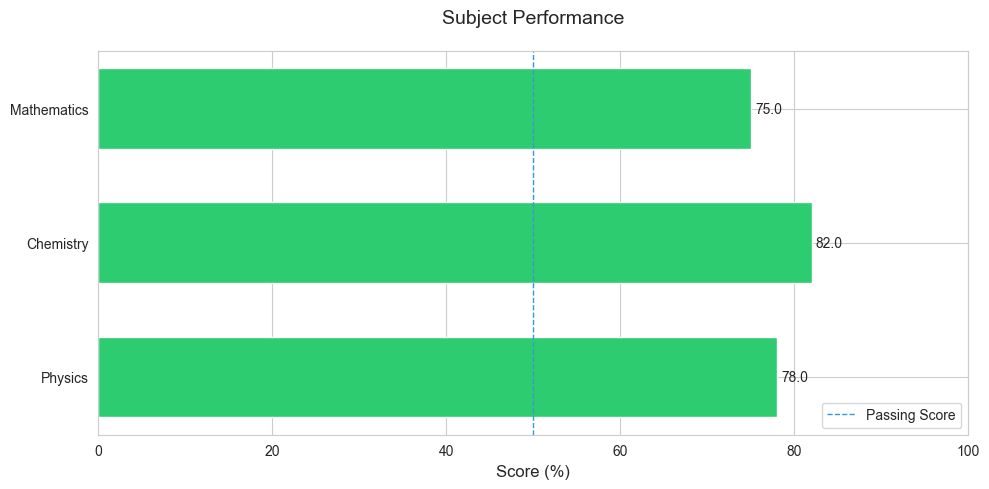


RTB Student Prediction:
Prediction error: name 'display_denied_result' is not defined


{'error': "Prediction error: name 'display_denied_result' is not defined",
 'decision': 'Error',
 'probability': None}

In [5]:
# PREWDICTION SAMPLE

# Example usage for REB student
reb_student = {
    'combination': 'PCM',
    'completed_year': 2024,
    'subject_scores': [
        ('Physics', 78),
        ('Chemistry', 82),
        ('Mathematics', 75)
    ],
    'has_trade_skills': 0,
    'application_fee_paid': 1,
    'program_choice': 'Electrical Engineering',
    'is_tvet': 0  # REB student
}

# Example usage for RTB student
rtb_student = {
    'combination': 'LSV',
    'completed_year': 2024,
    'subject_scores': [
        ('Road Alignment and Setting out', 78),
        ('Fundamental Surveying Computations', 82),
        ('Practical LSV', 20),
        ('Surveying Measurement Adjustment', 80),
        ('Mathematics I', 85)
    ],
    'has_trade_skills': 1,
    'application_fee_paid': 1,
    'program_choice': 'Land surveying',
    'is_tvet': 1  # RTB student
}

print("REB Student Prediction:")
predict_admission(reb_student)

print("\nRTB Student Prediction:")
predict_admission(rtb_student)